In [1]:
import pandas as pd

# Load the CSV file
file_path = "club.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())


  Country   League   Club       Player Names  Matches_Played  Substitution   \
0   Spain  La Liga  (BET)    Juanmi Callejon              19             16   
1   Spain  La Liga  (BAR)  Antoine Griezmann              36              0   
2   Spain  La Liga  (ATL)        Luis Suarez              34              1   
3   Spain  La Liga  (CAR)       Ruben Castro              32              3   
4   Spain  La Liga  (VAL)      Kevin Gameiro              21             10   

   Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0  1849     11   6.62              0.34     48        20                 2.47   
1  3129     16  11.86              0.36     88        41                 2.67   
2  2940     28  23.21              0.75    120        57                 3.88   
3  2842     13  14.06              0.47    117        42                 3.91   
4  1745     13  10.65              0.58     50        23                 2.72   

   On Target Per Avg Match  Year  
0  

In [30]:
# Assuming the columns are named 'Club' and 'Goals', you can aggregate the data to find the total goals per club
goals_per_club = df.groupby('Club')['Goals'].sum().reset_index()

# Find the club with the highest number of goals
highest_scoring_club = goals_per_club.loc[goals_per_club['Goals'].idxmax()]

# Print the club with the highest number of goals
print(f"The club with the highest number of goals is {highest_scoring_club['Club']} with {highest_scoring_club['Goals']} goals.")

# Insights
total_goals = goals_per_club['Goals'].sum()
average_goals = goals_per_club['Goals'].mean()

print(f"Total goals scored by all clubs: {total_goals}")
print(f"Average goals per club: {average_goals:.2f}")

# Display the goals per club for further analysis
print(goals_per_club)


The club with the highest number of goals is (BAR) with 224 goals.
Total goals scored by all clubs: 7386
Average goals per club: 41.26
       Club  Goals
0     (ACM)     80
1     (AJA)     59
2     (ALA)     34
3     (ANG)     16
4     (ARS)    124
..      ...    ...
174   Marco     16
175   Mario      9
176  Sandro     11
177   Santi     11
178     Tim     12

[179 rows x 2 columns]


Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution ', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year'],
      dtype='object')


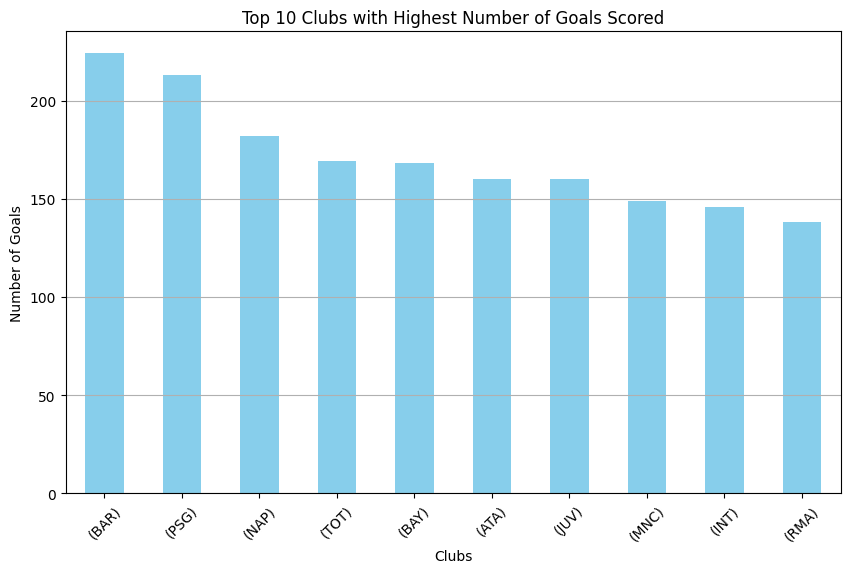

In [35]:
# Check the columns to find the one that contains goal data
print(df.columns)

# Assuming there is a column named 'Goals' representing the number of goals scored by each club
# Group by 'Club' and sum the goals
top_clubs = df.groupby('Club')['Goals'].sum().nlargest(10)

# Plotting the results
plt.figure(figsize=(10, 6))
top_clubs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Clubs with Highest Number of Goals Scored')
plt.xlabel('Clubs')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


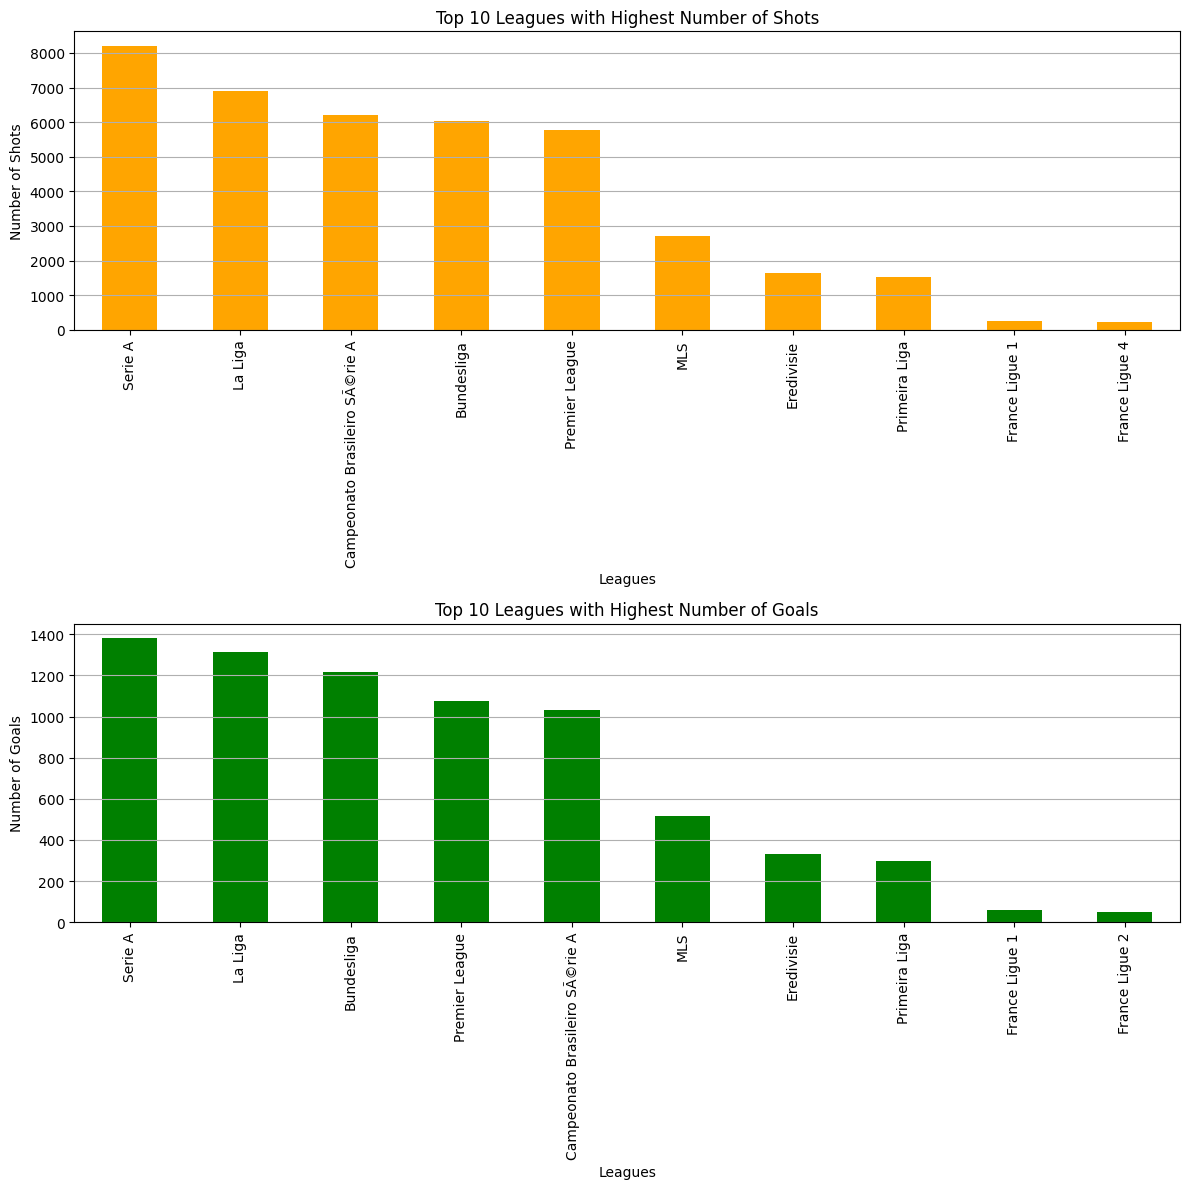

In [40]:
# Assuming the columns are named 'League', 'Shots', and 'Goals'
# Group by 'League' and sum the shots and goals
league_stats = df.groupby('League').agg({'Shots': 'sum', 'Goals': 'sum'})

# Get the top leagues for shots and goals
top_shots = league_stats['Shots'].nlargest(10)
top_goals = league_stats['Goals'].nlargest(10)

# Create a figure with subplots for better visualization
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Plotting the top leagues by shots
top_shots.plot(kind='bar', color='orange', ax=ax[0])
ax[0].set_title('Top 10 Leagues with Highest Number of Shots')
ax[0].set_ylabel('Number of Shots')
ax[0].set_xlabel('Leagues')
ax[0].grid(axis='y')

# Plotting the top leagues by goals
top_goals.plot(kind='bar', color='green', ax=ax[1])
ax[1].set_title('Top 10 Leagues with Highest Number of Goals')
ax[1].set_ylabel('Number of Goals')
ax[1].set_xlabel('Leagues')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()


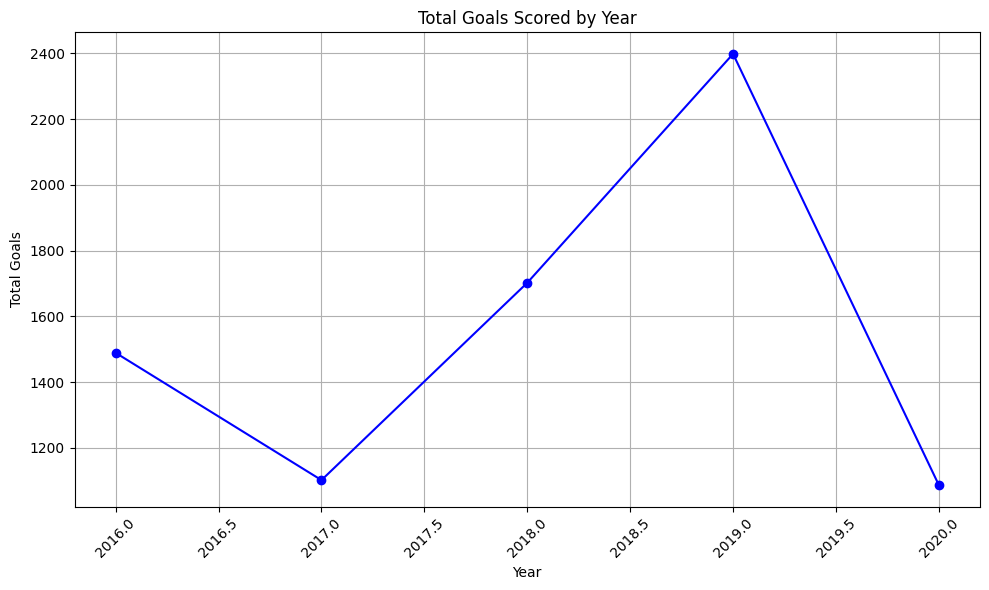

In [41]:
# Assuming the columns are named 'Year' and 'Goals'
# Group by 'Year' and sum the goals
goals_per_year = df.groupby('Year')['Goals'].sum()

# Plotting the results
plt.figure(figsize=(10, 6))
goals_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Total Goals Scored by Year')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [46]:
# Assuming the column for clubs is named 'Club' and the column for goals is named 'Goals'
# Group by 'Club' and sum the goals
goals_by_club = df.groupby('Club')['Goals'].sum().reset_index()

# Sort the clubs by the number of goals scored in descending order
goals_by_club = goals_by_club.sort_values(by='Goals', ascending=False)

# Display the result as a table
print(goals_by_club)


      Club  Goals
11   (BAR)    224
118  (PSG)    213
104  (NAP)    182
150  (TOT)    169
12   (BAY)    168
..     ...    ...
44   (DIJ)      4
18   (BOA)      3
63   (GIL)      3
102  (NAC)      3
52   (FAR)      2

[179 rows x 2 columns]
